# Cyclistic Bike Share case study by Google Data Analytics


## Scenario: 

>       **Cyclistic is a fictional bike-share company in Chicago. My project is to work as a data analyst for marketing team.
    
>       **Cyclistic has two types of customers- annual members and casual riders. 

>       **The director of marketing believes the company’s future success depends on maximizing the number of annual memberships.


### 1. Ask

#### Business Task: 
  1. How do annual members and casual riders use Cyclistic bikes differently?
  2. Why would casual riders buy Cyclistic membership?
  3. How can Cyclistic use digital media to influence casual riders to become members?
  
#### Key Stakeholders:
  1. Cyclistic executive team
  2. My manager, Lily Moreno
  3. Director of marketing
  4. he rest of the marketing analytics team

## 2. Prepare

  * Data was collected from Motivate International Inc under this license.
  
  * Data Source [link](https://divvy-tripdata.s3.amazonaws.com/index.html)
  
  * License [link](https://ride.divvybikes.com/data-license-agreement)
  
  * **Note**: The data sets have a different name because Cyclistic is a fictional company. 




#### **ROCCC Analysis**

  * *Reliable* - This data is complete and accurate. It includes all the bike rides taken.
    
  * *Original* - Data was collected from Motivate International Inc under this license.
    
  * *Comprehensive* - It includes every detail about the bike rides.
    
  * *Current* - Yes, data is current from May22 to Apr23.
    
  * *Cited*- Yes, It is under the Data License Agreement.

In [1]:
#Setting up my environment

library(tidyverse)
library(hms)
library(ggplot2)
library(janitor)
library(lubridate)
library(scales)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## 3. Process

In [2]:
bs1_df <- read.csv("/kaggle/input/cyclistic-bikes/202205-divvy-tripdata.csv")
bs2_df <- read.csv("/kaggle/input/cyclistic-bikes/202206-divvy-tripdata.csv")
bs3_df <- read.csv("/kaggle/input/cyclistic-bikes/202207-divvy-tripdata.csv")
bs4_df <- read.csv("/kaggle/input/cyclistic-bikes/202208-divvy-tripdata.csv")
bs5_df <- read.csv("/kaggle/input/cyclistic-bikes/202209-divvy-publictripdata.csv")
bs6_df <- read.csv("/kaggle/input/cyclistic-bikes/202210-divvy-tripdata.csv")
bs7_df <- read.csv("/kaggle/input/cyclistic-bikes/202211-divvy-tripdata.csv")
bs8_df <- read.csv("/kaggle/input/cyclistic-bikes/202212-divvy-tripdata.csv")
bs9_df <- read.csv("/kaggle/input/cyclistic-bikes/202301-divvy-tripdata.csv")
bs10_df <- read.csv("/kaggle/input/cyclistic-bikes/202302-divvy-tripdata.csv")
bs11_df <- read.csv("/kaggle/input/cyclistic-bikes/202303-divvy-tripdata.csv")
bs12_df <- read.csv("/kaggle/input/cyclistic-bikes/202304-divvy-tripdata.csv")

In [3]:
#Combined 12 months data into (1) data.frame named "cyclistic_bike_share"

cyclistic_bike_share <- rbind(bs1_df, bs2_df, bs3_df, bs4_df, bs5_df, bs6_df, bs7_df, bs8_df, bs9_df, bs10_df, bs11_df, bs12_df)

In [4]:
#cleaning data

cyclistic_bike_share <- janitor::remove_empty(cyclistic_bike_share,which = c("cols"))
cyclistic_bike_share <- janitor::remove_empty(cyclistic_bike_share,which = c("rows"))
cyclistic_bike_share_clean <- select(cyclistic_bike_share,"ride_id", "rideable_type", "started_at", "ended_at", "member_casual")
cyclistic_new <- cyclistic_bike_share_clean

#Create 'ride_length' column

cyclistic_new$ride_length <- difftime(cyclistic_new$ended_at, cyclistic_new$started_at, units = "mins")
cyclistic_new$ride_length <- round(cyclistic_new$ride_length, digits = 1)

##

cyclistic_new$date <- as.Date(cyclistic_new$started_at) 
cyclistic_new$day_of_week <- format(as.Date(cyclistic_new$date),"%A") #day of week column
cyclistic_new$month <- format(as.Date(cyclistic_new$date), "%m") #month column
cyclistic_new$day <- format(as.Date(cyclistic_new$date), "%d") #day column
cyclistic_new$year <- format(as.Date(cyclistic_new$date), "%Y") #year column
cyclistic_new$time <- format(as.Date(cyclistic_new$date), "%H:%M:%S") #time formatted HH:MM:SS



In [5]:
#Remove bad data, where length_ride was "zero" or negative

cyclistic_new <- na.omit(cyclistic_new) #remove rows with NA
cyclistic_new <- distinct(cyclistic_new) #remove duplicate rows
cyclistic_new <- cyclistic_new[!(cyclistic_new$ride_length <=0),]

## 4. Analyze

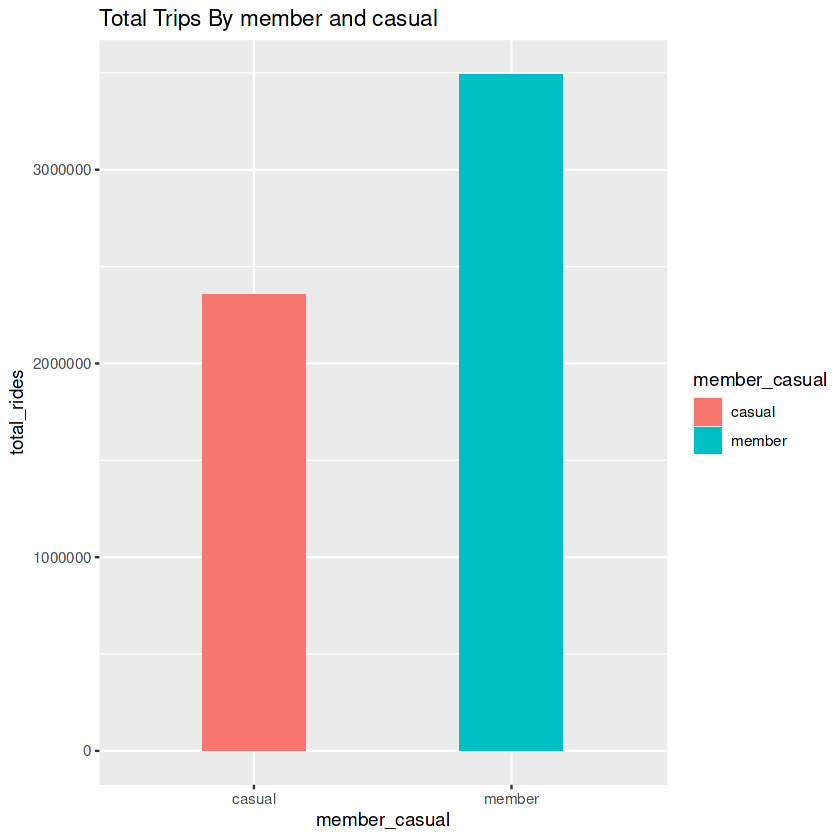

In [6]:
#Total rides

# member = 3493615
# casual = 2354867

cyclistic_new %>% 
  group_by(member_casual) %>%
  summarise(total_rides = length(ride_id)) %>% 
  arrange(member_casual)%>%
  ggplot(aes(x = member_casual, y = total_rides, fill = member_casual)) +
  labs(title = "Total Trips By member and casual") +
  geom_col(width = 0.4, position = position_dodge(width = 0.4)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

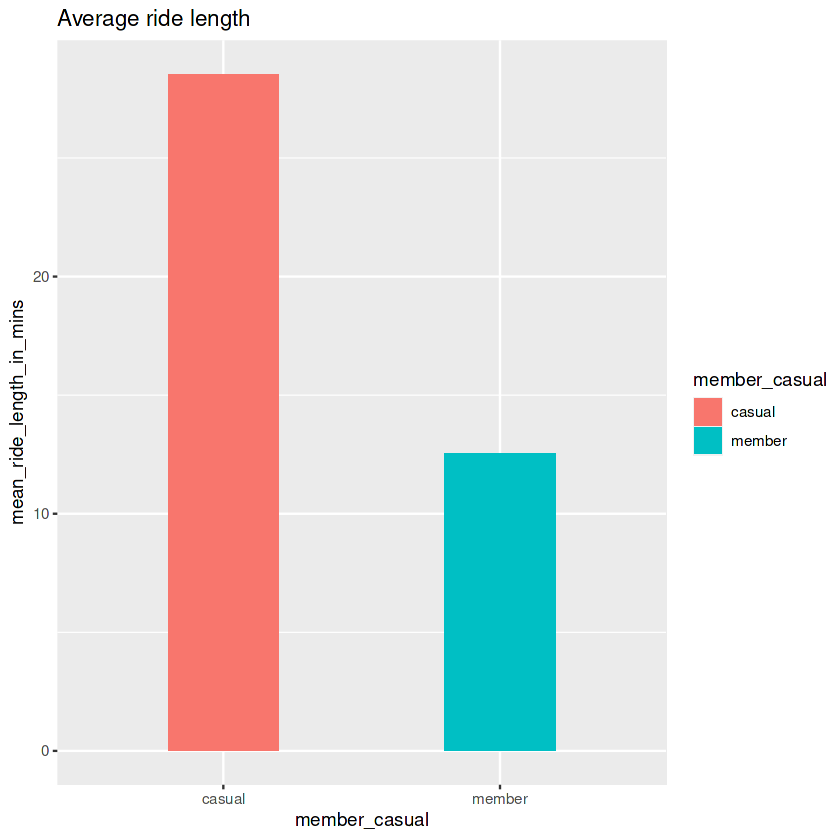

In [7]:
#Average of ride_length

# member = 12.52561 mins 
# casual = 28.53554 mins

cyclistic_new %>%
  group_by(member_casual) %>%
  summarize(mean_ride_length_in_mins = mean(ride_length)) %>% 
  ggplot(aes(x = member_casual, y = mean_ride_length_in_mins, fill = member_casual)) +
  labs(title = "Average ride length ") +
  geom_col(width = 0.4, position = position_dodge(width = 0.4)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

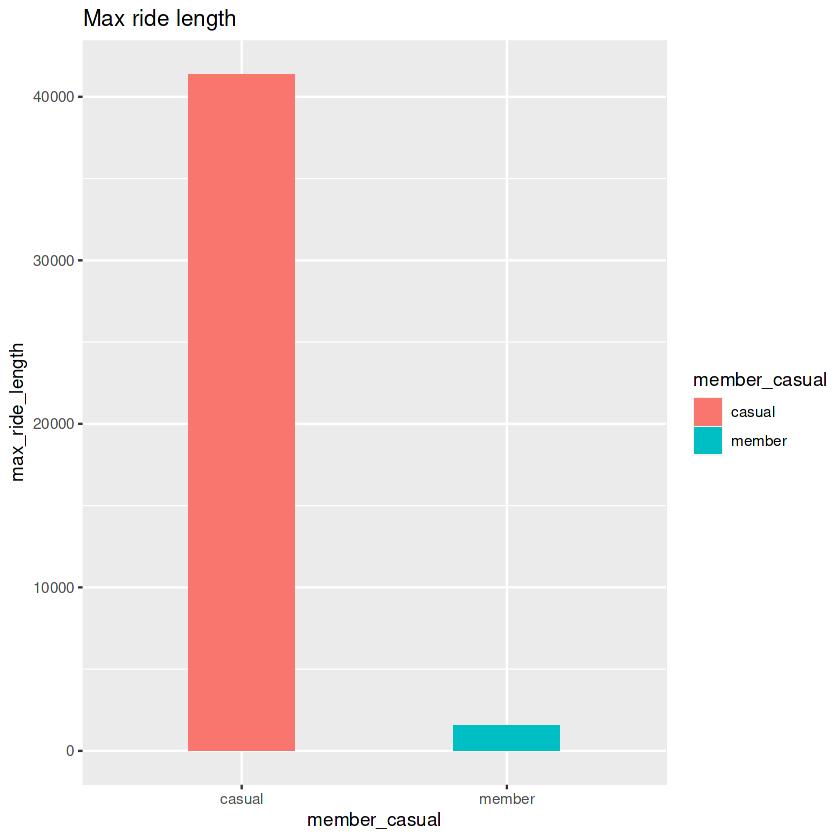

In [8]:
#Max ride length
#  Member = 1559.7 mins
#  Casual = 41387.2 mins


cyclistic_new %>%
  group_by(member_casual) %>%
  summarize(max_ride_length = max(ride_length)) %>% 
  ggplot(aes(x = member_casual, y = max_ride_length, fill = member_casual)) +
  labs(title = "Max ride length ") +
  geom_col(width = 0.4, position = position_dodge(width = 0.4)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))


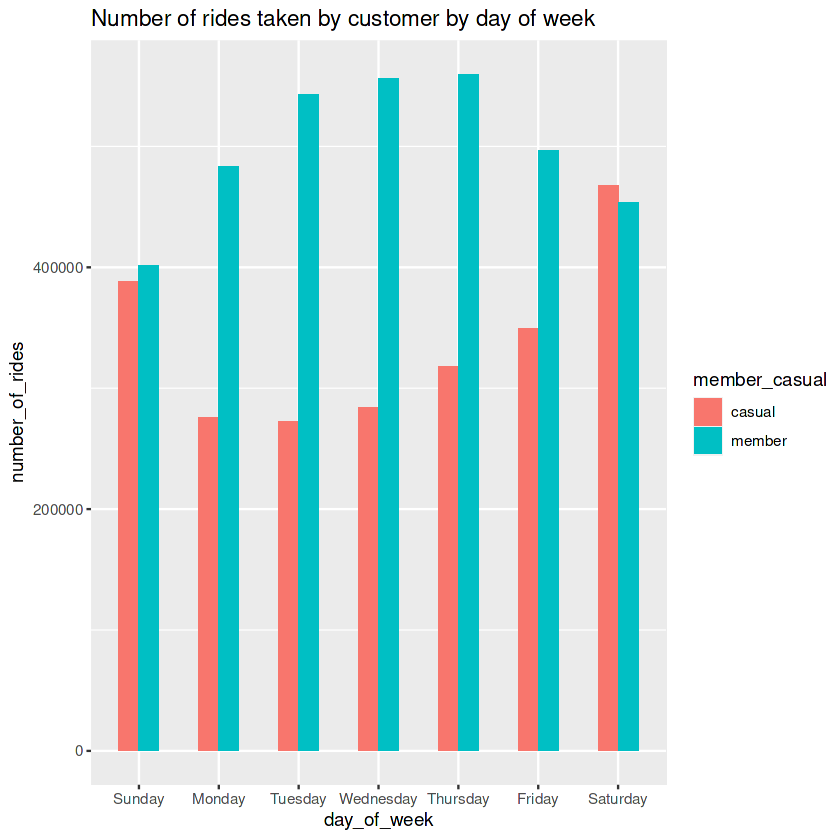

In [9]:
#Number of rides by day_of_week

# Members 
#  Day of maximum rides = Thursday
#  Day of minimum rides = Sunday or Weekend(Saturday and Sunday)

# Casual riders
#  Day of maximum rides = Saturday or Weekend(Saturday and Sunday)
#  Day of minimum rides = Monday and Tuesday

cyclistic_new$day_of_week <- ordered(cyclistic_new$day_of_week, 
                                    levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
cyclistic_new %>% 
  group_by(member_casual, day_of_week) %>%  #groups by member_casual
  summarize(number_of_rides = n() #calculates the number of rides and average duration 
  ,average_ride_length = mean(ride_length),.groups="drop") %>% # calculates the average duration
  arrange(member_casual, day_of_week) %>%  #sort
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  labs(title = "Number of rides taken by customer by day of week") +
  geom_col(width = 0.5, position = position_dodge(width = 0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


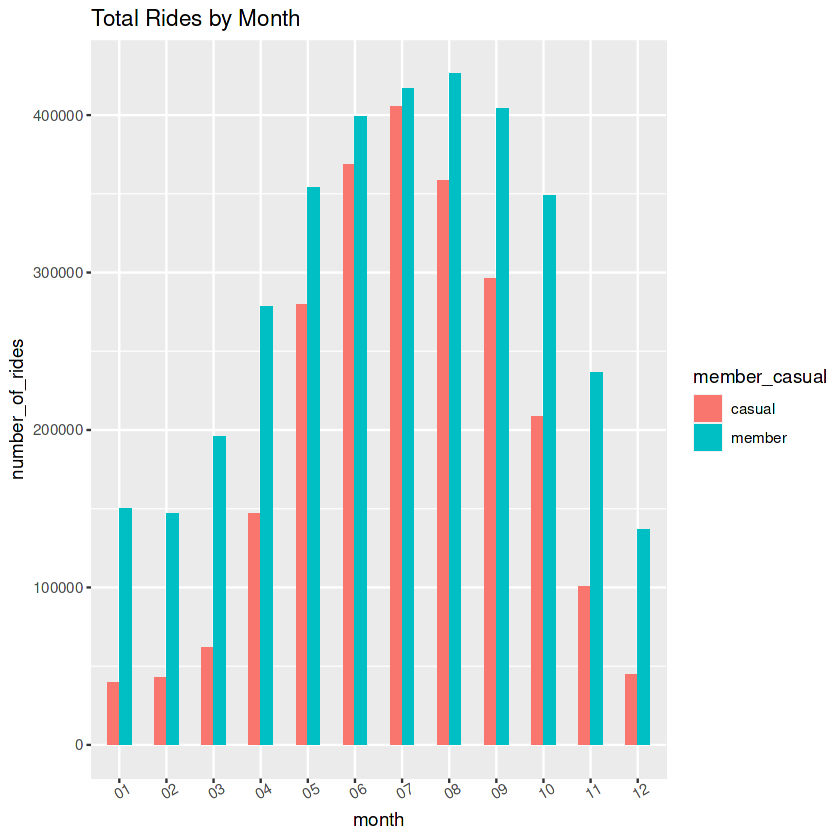

In [10]:
#Number of rides by Season

# Season of maximum rides 
#  Member = Jun-Sept
#  casual = Jun-Aug

cyclistic_new %>%
  group_by(member_casual, month)%>%
  summarize(number_of_rides = n())%>%
  arrange(member_casual, month)%>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  labs(title = "Total Rides by Month") +
  theme(axis.text.x = element_text(angle = 30)) +
  geom_col(width = 0.5, position = position_dodge(width = 0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


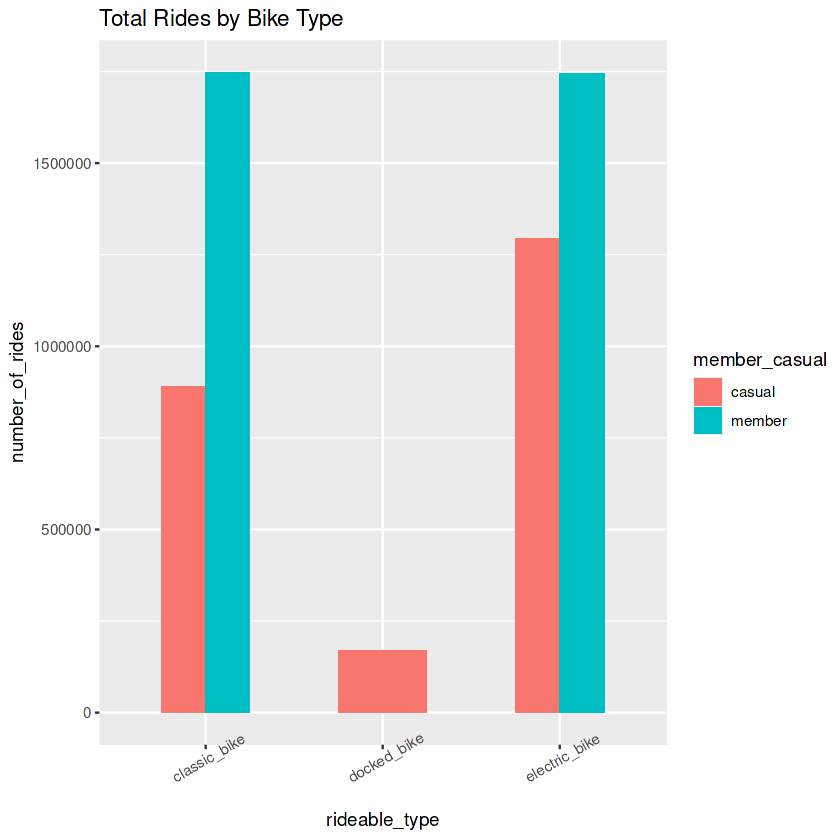

In [11]:
#Popular Bike
# Member = Electric Bike
# Casual = Electric and Classic Bike

cyclistic_new %>%
  group_by(rideable_type, member_casual)%>%
  summarize(number_of_rides = n())%>%
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) +
  theme(axis.text.x = element_text(angle = 30)) +
  geom_col(width = 0.5, position = position_dodge(width = 0.5)) +
  labs(title = "Total Rides by Bike Type") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

## 5. Share

### *Sharing my key findings and recommendations*

 **Key Findings**

  1.  Members have more rides than casual riders. 59% are members and 41% are casual rides.

  2.  The Average ride length of casual riders *higher* than members. Average ride length 
      of casual riders is 28.53 mins and of members is 12.52 mins.
      
  3.  Maximum ride length of casual riders is 41387.2 mins (689.78 hrs) and members is 1559.7 mins (25.995 hrs).
   
  4.  Members took maximum rides from Monday to Friday. And minimum rides On weekends. 
      This represent members must be locals.

  5.  Casual riders took maximum rides on weekends(Saturday and Sunday). These customers 
      must be using the bikeshare for recreation.

  6.  The summer season (Jun-Sept) has maximum numbers of rides by both type of customers.

  7.  The popular bikes are electric bikes and classic bikes.


**Recommendations**

  1.  The Cyclistic company can give offers and gift cards on purchase of Cyclistic_membership.

  2.  The company can give discount and other facilities to buying membership.

  3.  Weekly membership can be a good option for tourists.